In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [36]:
def sigmoid(x):
    return 1/(np.exp(-x)+1)

def sigmoidDiff(x):
    return np.exp(x)/(np.exp(x)+1)**2

def err(actual, pred):
    return (sigmoid(pred)-actual)*np.log(sigmoid(pred))

def errDiff(inputs, actual, pred):
    e_s = (sigmoid(pred)-actual) * sigmoid(pred) / sigmoid(pred)
    s_o = sigmoidDiff(pred)
    e_o = e_s*s_o
    return np.tensordot(inputs,e_o,0)

def feed(inputs, weights):
    return np.dot(weights.T,inputs)

def target(x):
    return np.ceil(x-np.random.random_sample((len(x),)))

def optimize(weights,momentum,targets,inputs,learningRate,B=0.9):
    ediff = errDiff(inputs,targets,feed(inputs,weights))
    nextMoment = B*momentum+(1-B)*ediff
    return np.array([[w-learningRate*m for w,m in zip(weight,moment)] for weight,moment in zip(weights,nextMoment)]), nextMoment


Single state

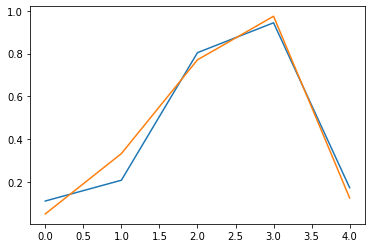

In [57]:
inputs = 5
outputs = 5
inp = np.ones(inputs)
targ = np.random.random_sample((outputs,))
wgt = np.random.random_sample((outputs,inputs))
lr = 0.1
m = np.zeros((outputs,inputs))

for _ in range(200):
    wgt,m = optimize(wgt,m,target(targ),inp,lr)
results = np.array([sigmoid(feed(inp,wgt)),targ]).T
plt.plot(results)

Multi-State

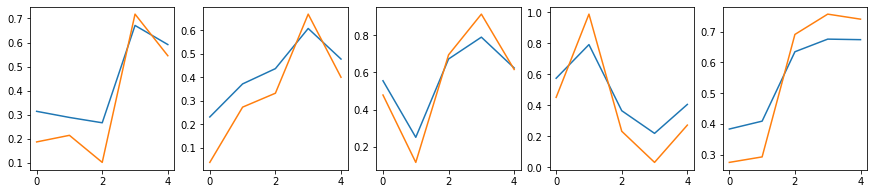

In [60]:
inputs = 5
outputs = 5
states = 5
inps = np.eye(states)
targs = np.random.random_sample((outputs,states))
wgts = np.random.random_sample((outputs,inputs))
lr = 0.1
m = np.zeros((outputs,inputs))

for epoch in range(1000):
    wgts,m = optimize(wgts,m,target(targs[epoch%states]),inps[epoch%states],lr)
results = [np.array([sigmoid(feed(inps[n],wgts)),targs[n]]).T for n in range(states)]

fig, axs = plt.subplots(1, outputs, figsize=(3*outputs,3))
for j,ax in enumerate(axs):
    ax.plot(results[j])